In [2]:
import netCDF4 as nc
import xarray 
import torch
import pandas as pd
import sys 

#Plotting in 2d/3d:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Ellipse
from matplotlib.colors import Normalize
import matplotlib.cm as cm
%matplotlib inline

In [27]:


filename = 'Data/dt_med_twosat_phy_l4_20190215_vDT2018.nc'
ds = nc.Dataset(filename)
#print(ds['time'][:])
#print(type(ds))
#print(ds.dimensions)

#print(ds.variables)
#Load the data as an xarray:
Y_data=xarray.open_dataset(filename)#.to_array()
Y_data=Y_data.drop_dims(['nv','time']).to_array()

#Select the variables of interest:
Y_data=Y_data.loc[['ugos','vgos','ugosa','vgosa']]

#Transpose the data and get the number of observations:
Y_data=Y_data.transpose("longitude","latitude","variable") 

Longitude=torch.tensor(Y_data.coords['longitude'].values,dtype=torch.get_default_dtype())
Latitude=torch.tensor(Y_data.coords['latitude'].values,dtype=torch.get_default_dtype())

n_per_y_axis=Latitude.size(0)
n_per_x_axis=Longitude.size(0)

n_points_per_obs=n_per_y_axis*n_per_x_axis

X_tensor=torch.stack([Longitude.repeat_interleave(n_per_y_axis),Latitude.repeat(n_per_x_axis)],dim=1)

Y_tensor=torch.from_numpy(Y_data.loc[:,:,:,['ugosa','vgosa']].values).reshape(-1,2)




ValueError: coordinate latitude has dimensions ('latitude',), but these are not a subset of the DataArray dimensions ('variable',)

In [ ]:
#Region around cyprus: ['cyprus1', 35,30,32,27]


In [57]:
ind_cyprus=(X_tensor[:,0]>27.)&(X_tensor[:,0]<30.)&(X_tensor[:,1]>32.)&(X_tensor[:,1]<35.)
X_sel=X_tensor[ind_cyprus].float()
Y_sel=Y_tensor[ind_cyprus].float()

In [58]:
torch.cat([X_sel,Y_sel],dim=1)

tensor([[ 2.7062e+01,  3.2062e+01,  4.6800e-02, -1.2420e-01],
        [ 2.7062e+01,  3.2188e+01,  5.5300e-02, -1.3990e-01],
        [ 2.7062e+01,  3.2312e+01,  5.3700e-02, -1.2770e-01],
        ...,
        [ 2.9938e+01,  3.4688e+01, -8.2500e-02, -1.1970e-01],
        [ 2.9938e+01,  3.4812e+01, -6.7600e-02, -1.1210e-01],
        [ 2.9938e+01,  3.4938e+01, -1.9100e-02, -7.1000e-02]])

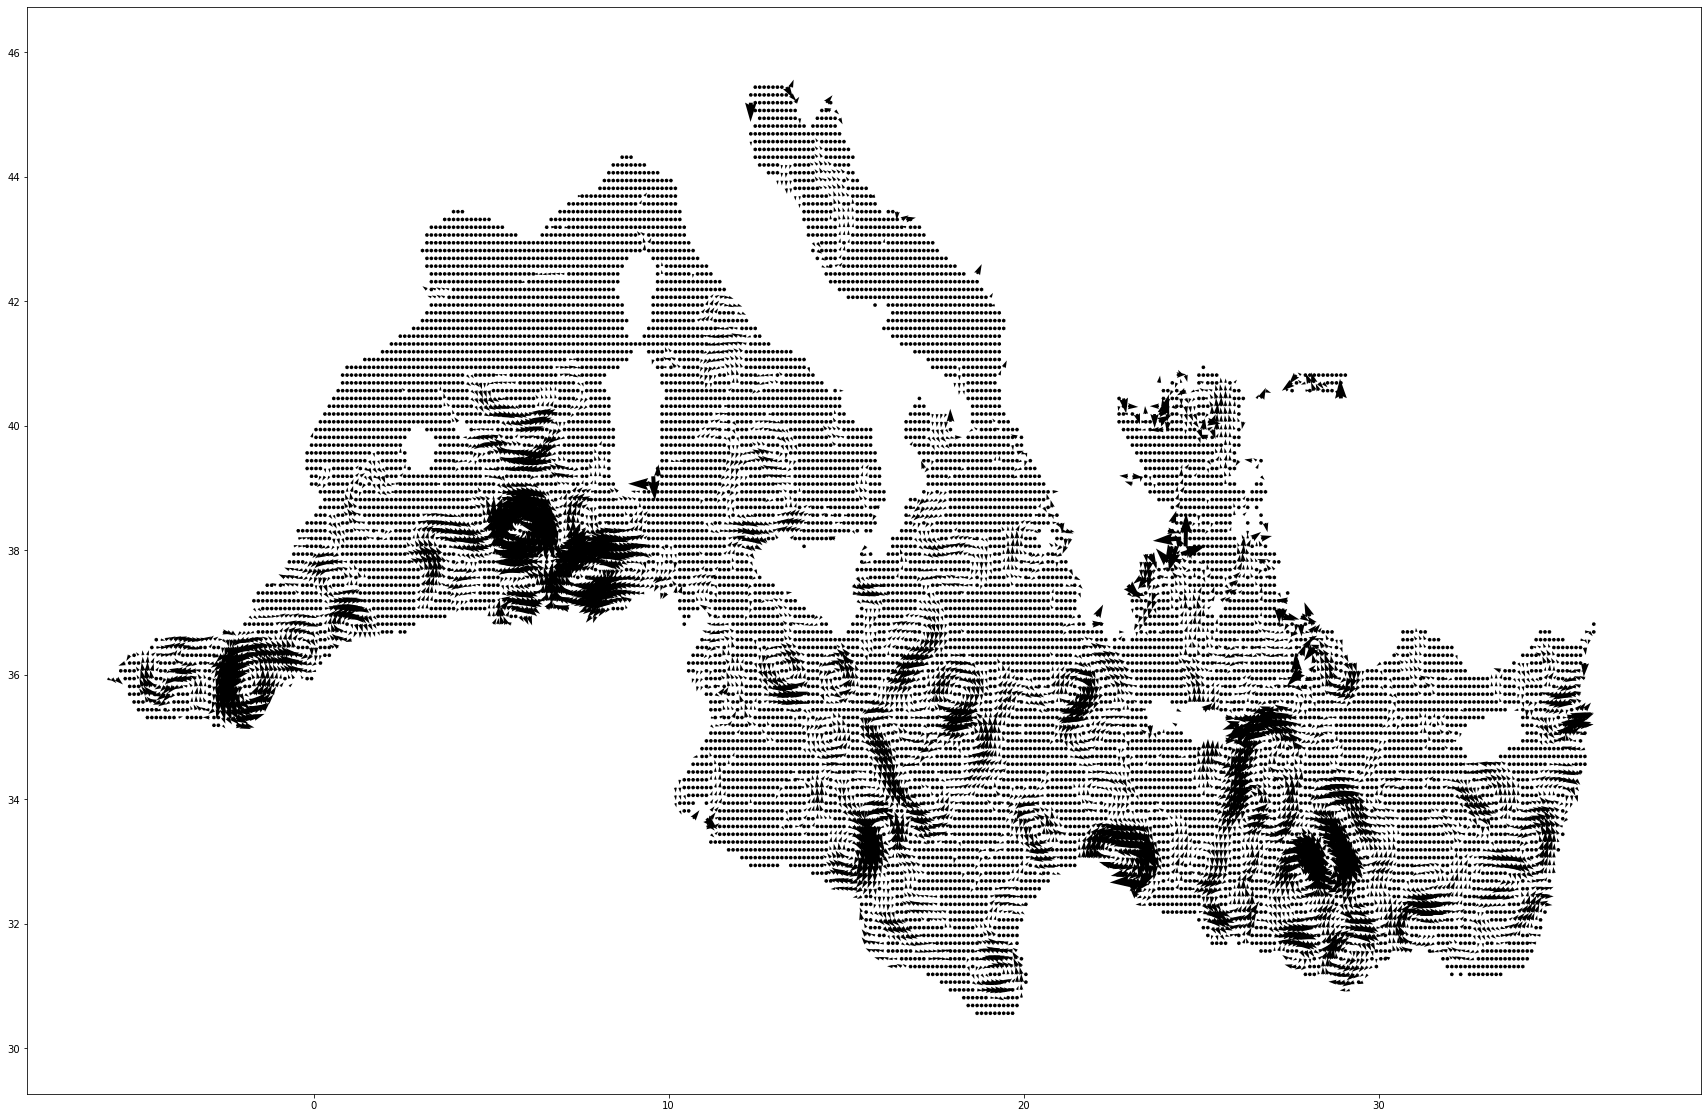

In [34]:
fig,ax=plt.subplots(1,1,figsize=(30,20))
ax.quiver(X_tensor[:,0],X_tensor[:,1],Y_tensor[:,0],Y_tensor[:,1])


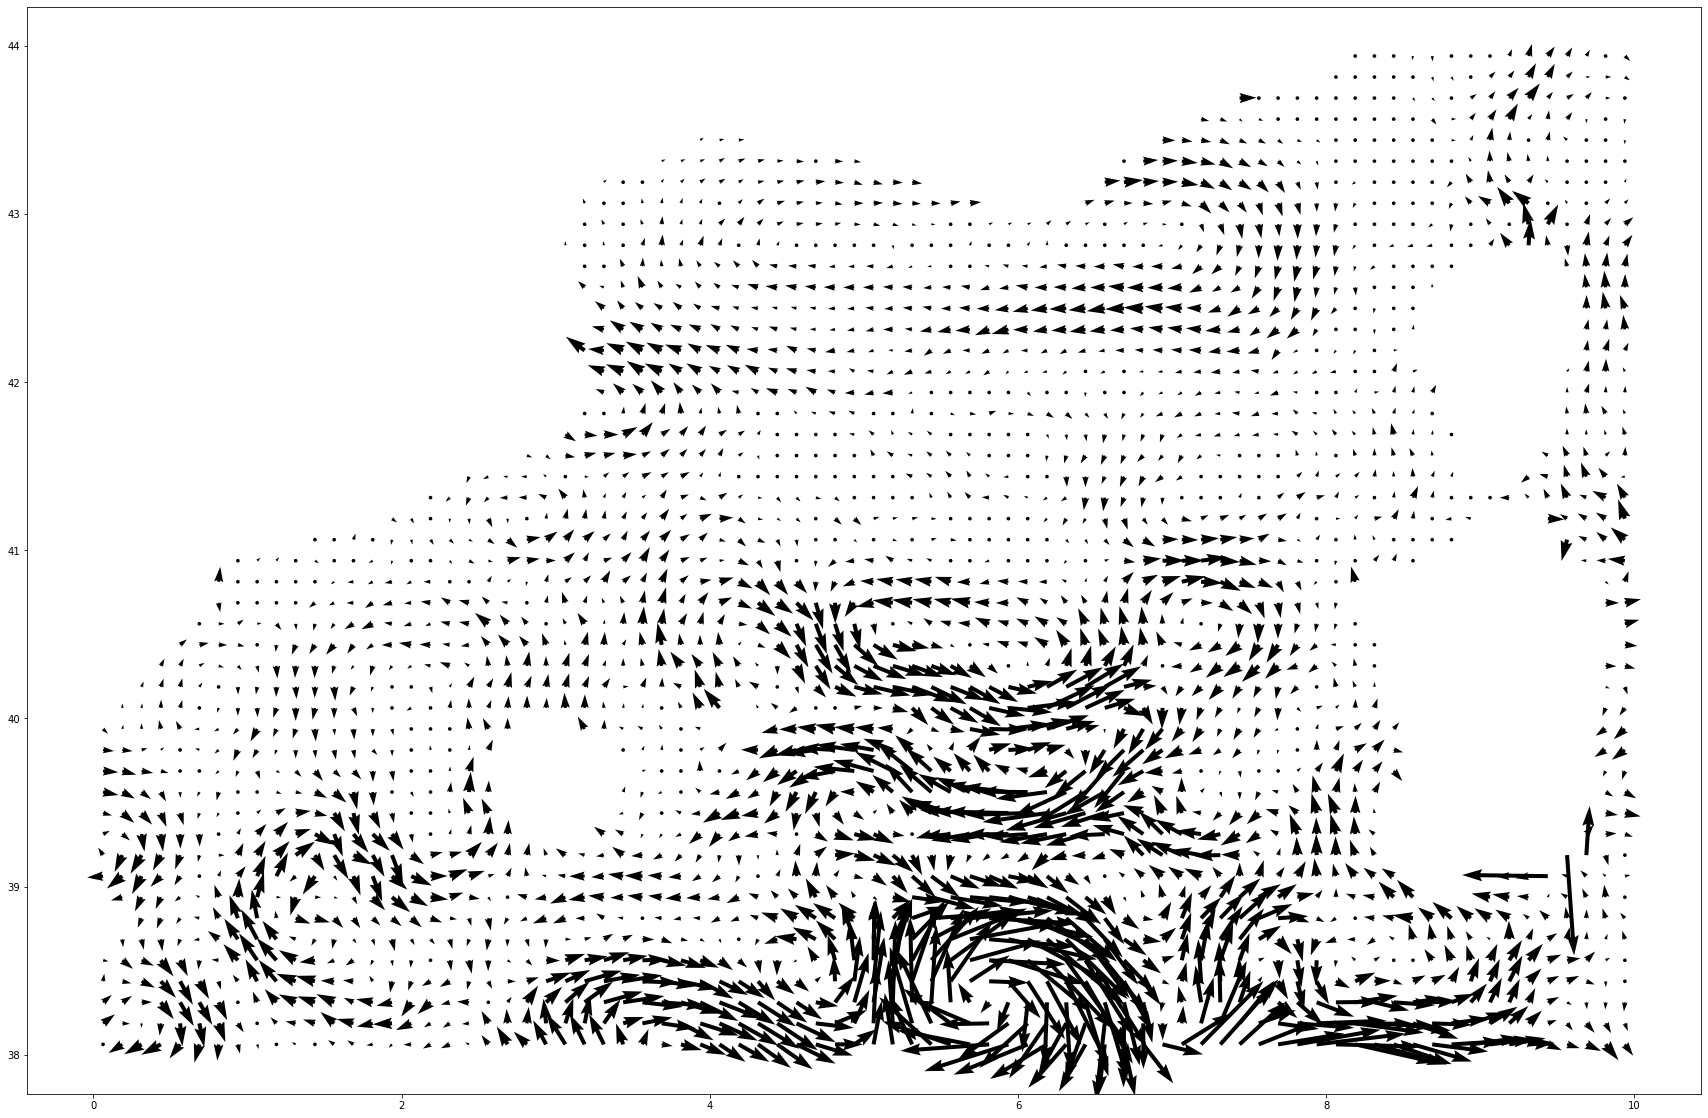

In [35]:
fig,ax=plt.subplots(1,1,figsize=(30,20))
ax.quiver(X_sel[:,0],X_sel[:,1],Y_sel[:,0],Y_sel[:,1])



In [41]:
#Idea: Go over all time points and pick from the six regions a frame and convert it at the end to a numpy
#array of shape (n_samples,574 (=24*24=number of points per observations),4=2+2=(x-coordinates and y-coordinates of stream))
#To get a data set of reasonable shape (n_samples=25 000 for train, we would need 5000 per region = 500/365 = 15 years of data)

tensor([nan, nan, nan,  ..., nan, nan, nan], dtype=torch.float64)